# Test a portfolio strategy

In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
tickers = ['SPY', 'TLT']

start = dt.datetime(2010, 1, 1)
end = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start, end)

In [6]:
data = data['Adj Close']

In [7]:
portfolio = [.5, .5]

<IPython.core.display.Javascript object>


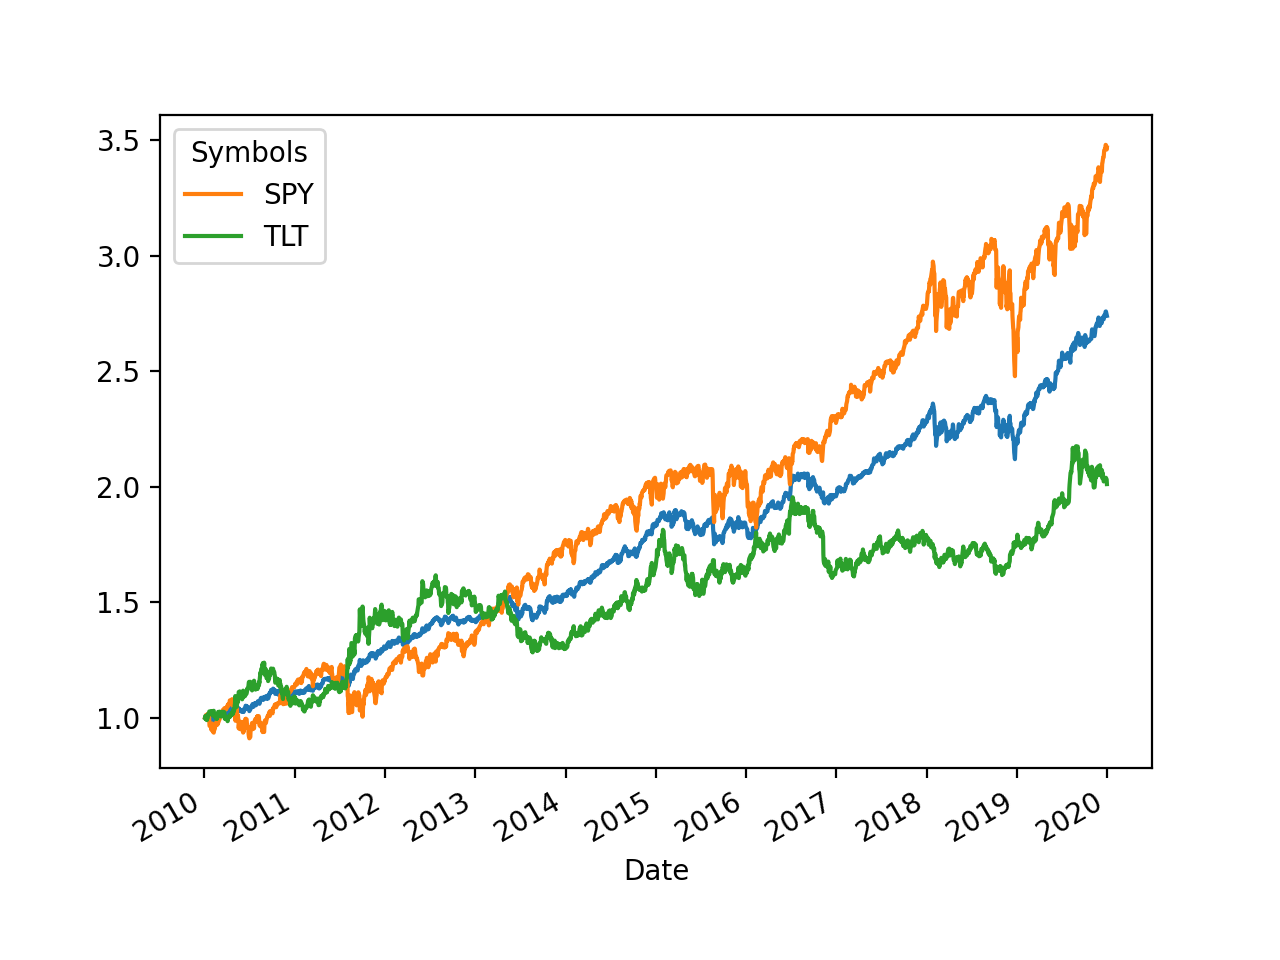

<AxesSubplot:xlabel='Date'>

In [14]:
fig, ax = plt.subplots()

((data/data.iloc[0])*portfolio).sum(axis=1).plot(ax=ax)
(data/data.iloc[0]).plot(ax=ax)

In [16]:
strategy = ((data/data.iloc[0])*portfolio).sum(axis=1)

In [17]:
log_returns = np.log(strategy/strategy.shift())

### GAGR

In [18]:
(strategy.iloc[-1]/strategy.iloc[0])**(1/10) - 1

0.10604708018881137

### Drawdown

In [19]:
rolling_max = strategy.cummax()
daily_drawdown = strategy/rolling_max - 1
max_drawdown = daily_drawdown.cummin().iloc[-1]
max_drawdown

-0.11451278331079628

### Volatility

In [20]:
log_returns.std()*(252**0.5)

0.0745944542311284

## Comparison

In [23]:
spy = data['SPY']
cagr = (spy.iloc[-1]/spy.iloc[0])**(1/10) - 1
print("CAGR", cagr)

rolling_max = spy.cummax()
daily_drawdown = spy/rolling_max - 1
max_drawdown = daily_drawdown.cummin().iloc[-1]
print("Drawdown", max_drawdown)

spy_log_returns = np.log(spy/spy.shift())
print("Volatility", spy_log_returns.std()*(252**.5))

CAGR 0.13244548148388002
Drawdown -0.1934892785101755
Volatility 0.14717472883158292
